In [181]:
import sqlite3
import pandas as pd
import numpy as np
# 连接到数据库文件
conn = sqlite3.connect("../pokemmo.sqlite")
# 创建游标对象
cursor = conn.cursor()

In [182]:
# 执行查询语句
query = """
SELECT x_coords,y_coords,map_number_tuple FROM general_status
where map_number_tuple = '(1, 13, 50)'
or map_number_tuple = '(1, 29, 50)'
or map_number_tuple = '(1, 0, 70)'
or map_number_tuple = '(1, 1, 70)'
or map_number_tuple = '(1, 98, 74)'

"""
cursor.execute(query)

# 获取查询结果
results = cursor.fetchall()
df = pd.DataFrame(results, columns=['x_coords', 'y_coords', 'map_number_tuple'])
df.head()



,x_coords,y_coords,map_number_tuple
0,14,8,"(1, 13, 50)"
1,14,8,"(1, 13, 50)"
2,14,8,"(1, 13, 50)"
3,14,7,"(1, 13, 50)"
4,14,7,"(1, 13, 50)"


In [183]:
numeric_cols = ['x_coords', 'y_coords', 'map_number_tuple']
statistics = df[numeric_cols].describe()
print(statistics)

          x_coords     y_coords
count  3284.000000  3284.000000
mean     32.788977    12.787454
std      34.413863    10.781066
min       0.000000     1.000000
25%       9.000000     8.000000
50%      17.000000    10.000000
75%      38.000000    12.000000
max     135.000000    73.000000


增加offset

In [184]:
df['new_x']=df['x_coords']
df['new_y'] = df['y_coords']

df['new_x'] = df.apply(lambda row: row['new_x'] -40 if row['map_number_tuple'] == '(1, 29, 50)' else row['new_x'], axis=1)

df['new_x'] = df.apply(lambda row: row['new_x'] -15 if row['map_number_tuple'] == '(1, 0, 70)' else row['new_x'], axis=1)
df['new_y'] = df.apply(lambda row: row['new_y'] -3 if row['map_number_tuple'] == '(1, 0, 70)' else row['new_y'], axis=1)


df['new_x'] = df.apply(lambda row: row['new_x'] -17 if row['map_number_tuple'] == '(1, 1, 70)' else row['new_x'], axis=1)
df['new_y'] = df.apply(lambda row: row['new_y'] -28 if row['map_number_tuple'] == '(1, 1, 70)' else row['new_y'], axis=1)

df['new_x'] = df.apply(lambda row: row['new_x'] -21 if row['map_number_tuple'] == '(1, 98, 74)' else row['new_x'], axis=1)
df['new_y'] = df.apply(lambda row: row['new_y'] -39 if row['map_number_tuple'] == '(1, 98, 74)' else row['new_y'], axis=1)

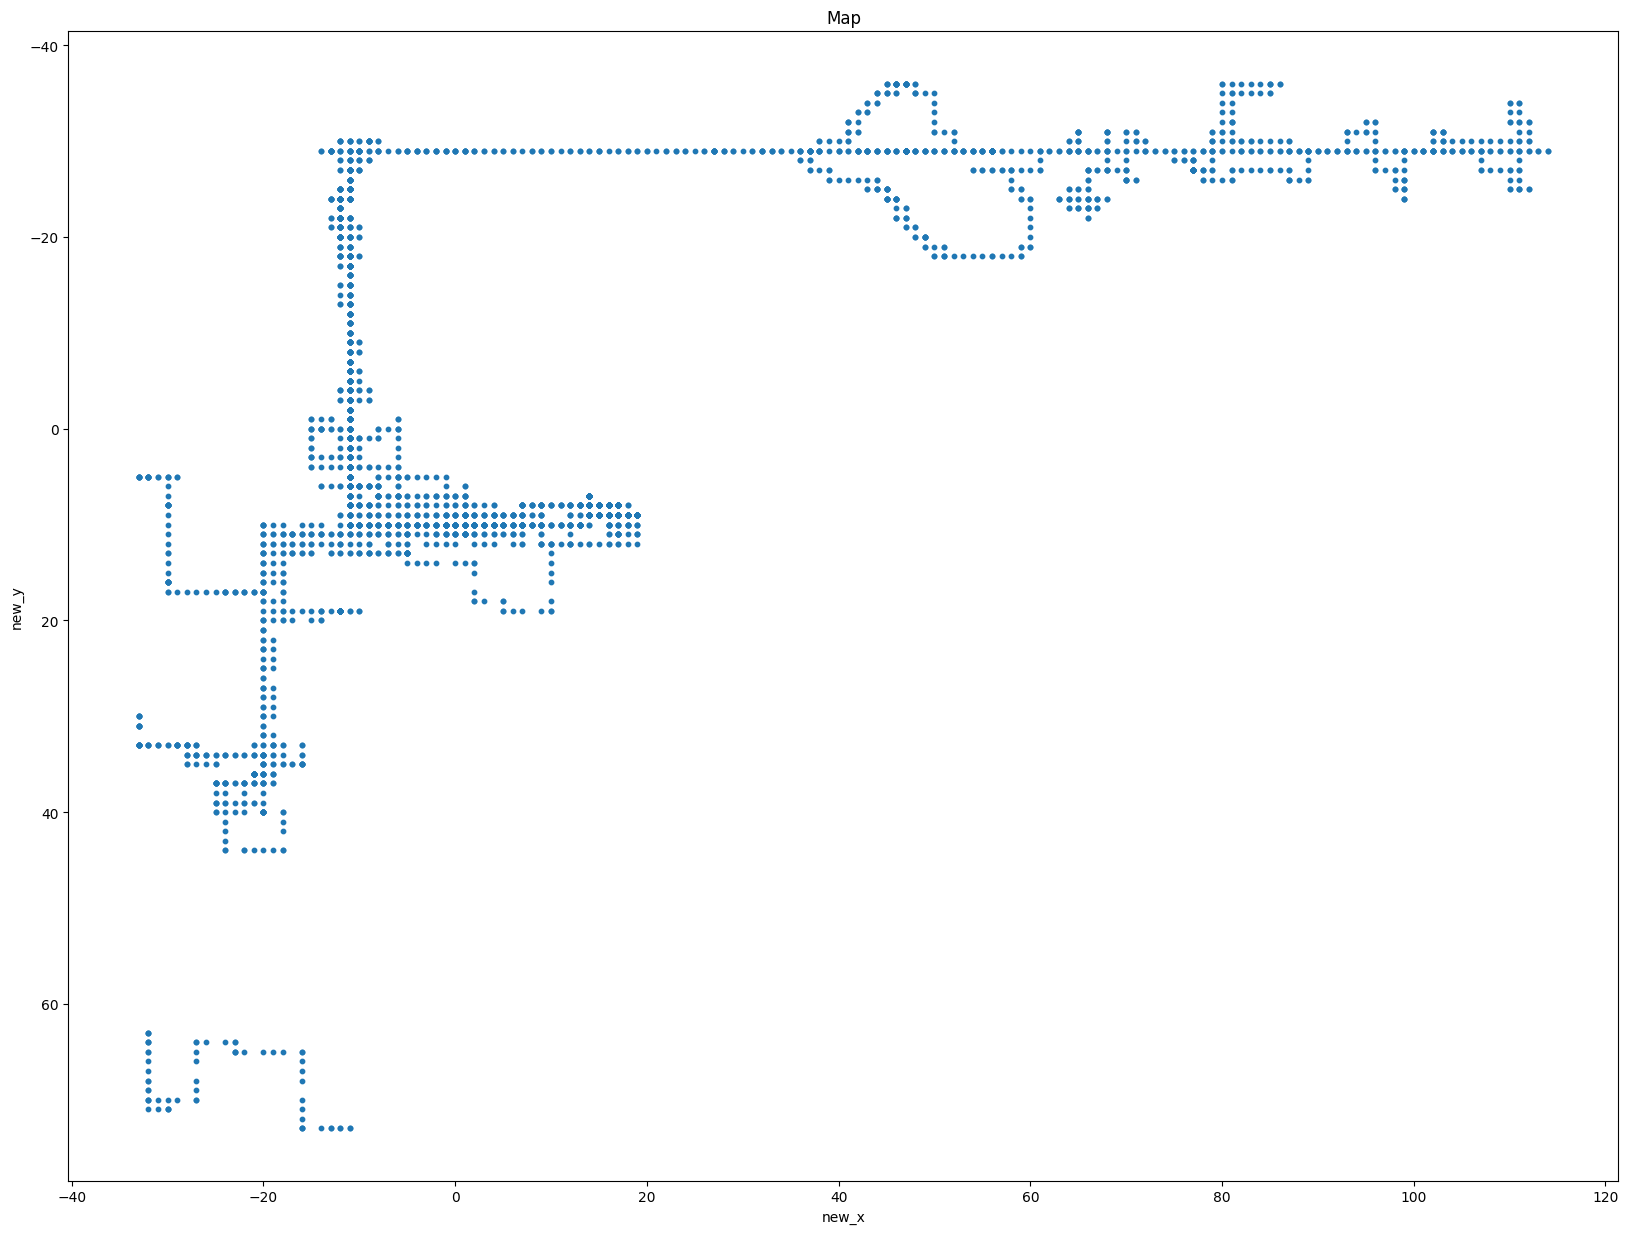

In [185]:
import matplotlib.pyplot as plt

# 创建图形对象和坐标轴
fig, ax = plt.subplots(figsize=(20, 20))  # 调整图形大小

# 绘制散点图，调整坐标点大小
ax.scatter(df['new_x'], df['new_y'], s=10)  # 调整坐标点大小

# 反转 y 轴
ax.invert_yaxis()

# 设置坐标轴标签
ax.set_xlabel('new_x')
ax.set_ylabel('new_y')

# 设置标题
ax.set_title('Map')

# 调整坐标轴比例相同
ax.set_aspect('equal')

# 显示图形
plt.show()


In [187]:
# 将坐标点四舍五入到最近的整数
df = df.round(0)
# 创建一个空的DataFrame，它的行和列分别代表y和x的值
grid_df = pd.DataFrame(index=np.arange(int(df['new_y'].min()), int(df['new_y'].max()) + 1),
                       columns=np.arange(int(df['new_x'].min()), int(df['new_x'].max()) + 1))

# 将存在的坐标点填充为1
for _, row in df.iterrows():
    grid_df.at[int(row['new_y']), int(row['new_x'])] = 4

# # 反转y轴
#grid_df = grid_df.iloc[::-1]

# 导出到Excel
grid_df.to_excel("../asserts/coords_tracking/Fallarbor Town Ditto coordinates.xlsx")

In [1]:
import sqlite3
import pandas as pd
import numpy as np
df=pd.read_excel("../asserts/coords_tracking/Fallarbor Town Ditto coordinates.xlsx", index_col=0)
# 先重置索引，这样行标签就变成一列
df = df.reset_index()
df

,index,-33,-32,-31,-30,-29,-28,-27,-26,-25,...,105,106,107,108,109,110,111,112,113,114
0,-36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4,4,NaN,NaN,NaN
3,-33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4,4,NaN,NaN,NaN
4,-32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4,4,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,69,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,70,NaN,4.0,4.0,4.0,4.0,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,71,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# 使用 melt，这会把所有列都转成两列，一列是原来的列名（变量），一列是对应的值
df_melted = df.melt(id_vars='index', var_name='x_coords', value_name='mark')
df_melted

,index,x_coords,mark
0,-36,-33,NaN
1,-35,-33,NaN
2,-34,-33,NaN
3,-33,-33,NaN
4,-32,-33,NaN
...,...,...,...
16275,69,114,NaN
16276,70,114,NaN
16277,71,114,NaN
16278,72,114,NaN


In [3]:
# 修改列名
df_melted.rename(columns={'index': 'y_coords'}, inplace=True)
df_melted

,y_coords,x_coords,mark
0,-36,-33,NaN
1,-35,-33,NaN
2,-34,-33,NaN
3,-33,-33,NaN
4,-32,-33,NaN
...,...,...,...
16275,69,114,NaN
16276,70,114,NaN
16277,71,114,NaN
16278,72,114,NaN


In [4]:
# 过滤掉 mark 列为 NaN 的行
df_melted = df_melted.dropna(subset=['mark'])
df_melted

,y_coords,x_coords,mark
41,5,-33,4.0
66,30,-33,4.0
67,31,-33,4.0
69,33,-33,4.0
151,5,-32,4.0
...,...,...,...
15956,-30,112,4
15957,-29,112,farming
15961,-25,112,4
16067,-29,113,farming


In [5]:
# 把值为PC_IN的单元格的值改成112
df_melted.loc[df_melted['mark'] == 'pc_in', 'mark'] = 112

df_melted.loc[df_melted['mark'] == 'farming', 'mark'] = 66
# 所有float类型的值转成int
df_melted = df_melted.astype({'mark': 'int'})

df_melted.reset_index(drop=True, inplace=True)

# 输出查看结果
print(df_melted)

     y_coords x_coords  mark
0           5      -33     4
1          30      -33     4
2          31      -33     4
3          33      -33     4
4           5      -32     4
..        ...      ...   ...
866       -30      112     4
867       -29      112    66
868       -25      112     4
869       -29      113    66
870       -29      114    66

[871 rows x 3 columns]


In [6]:
df_melted.to_csv('../asserts/coords_tracking/Fallarbor_Town_Ditto_coords_tracking.csv')

In [8]:
# 关闭游标和连接
cursor.close()
conn.close()

NameError: name 'cursor' is not defined